## Goal: 
Set up Cereals displays around store based on various niches of cereals

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv(r'../Data/cereal.csv')
df.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25


In [5]:
df.shape

(74, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cereal Name            74 non-null     object
 1   Manufacturer           74 non-null     object
 2   Calories               74 non-null     int64 
 3   Protein (g)            74 non-null     int64 
 4   Fat                    74 non-null     int64 
 5   Sugars                 74 non-null     int64 
 6   Vitamins and Minerals  74 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 4.2+ KB


In [8]:
df_eng = df.drop(['Cereal Name','Manufacturer'],axis=1)
df_eng.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [15]:
# Standarization
from sklearn.preprocessing import StandardScaler

StandardScaler_std = StandardScaler()
standarized = StandardScaler_std.fit_transform(df_eng)
df_std = pd.DataFrame(standarized,columns=df_eng.columns)
df_std.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,-1.940286,1.387392,0.056478,-0.173586,-0.149270
1,0.789394,0.462464,4.235869,0.277129,-1.253871
2,-1.940286,1.387392,0.056478,-0.398944,-0.149270
3,-3.032158,1.387392,-0.988369,-1.525731,-0.149270
4,0.243458,-0.462464,1.101326,0.277129,-0.149270


In [16]:
# applyting K-means
from sklearn.cluster import KMeans

KMeans_2 = KMeans(n_clusters=2,n_init='auto',random_state=2023)
KMeans_2.fit(df_std)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=2023)

In [17]:
KMeans_3 = KMeans(n_clusters=3,n_init='auto',random_state=2023)
KMeans_3.fit(df_std)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=2023)

In [19]:
# view previous inertia values
KMeans_2.inertia_, KMeans_3.inertia_

(301.8948565181933, 232.29244311337925)

In [21]:
# create an empty list to hold many inertia values
inertia_values = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in range(2, 16): # total clusters to try 
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(df_std)
    inertia_values.append(kmeans.inertia_)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

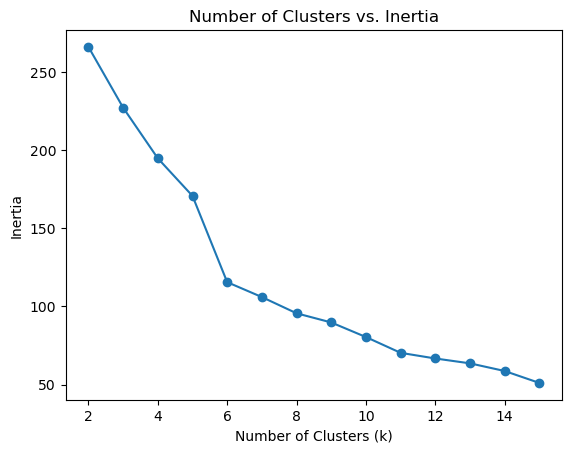

In [22]:
# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16)) #update index to range of clusters

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

# Look fot he elbow where adding another cluster does not affect the next to drop
# Fit a cluster with best kmeans interpret if makes sence great if not try another n_cluster number

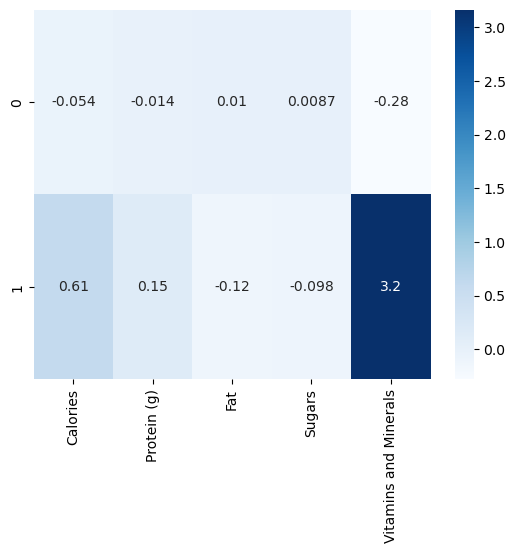

In [28]:
# we wil check 2,3 and 6

sns.heatmap(pd.DataFrame(KMeans_2.cluster_centers_,columns=df_eng.columns),annot=True,cmap='Blues');

In [ ]:
# Cluester 0: Garbage
# Cluester 1: High Vits&minerals

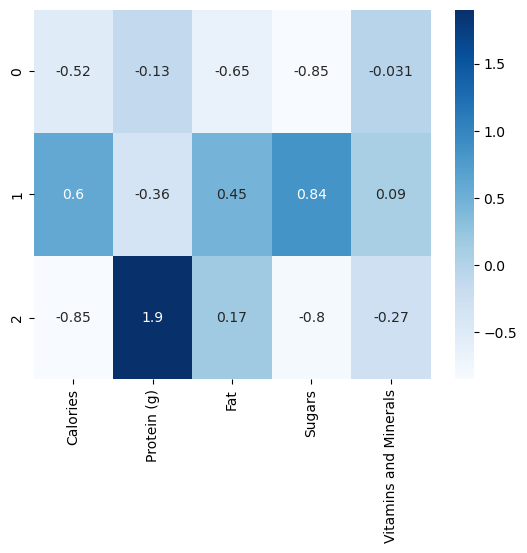

In [34]:
sns.heatmap(pd.DataFrame(KMeans_3.cluster_centers_,columns=df_eng.columns),annot=True,cmap='Blues');

In [ ]:
#Cluster 0: Garbage
#Cluster 1: Sugar
#Cluster 2: High Protein

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


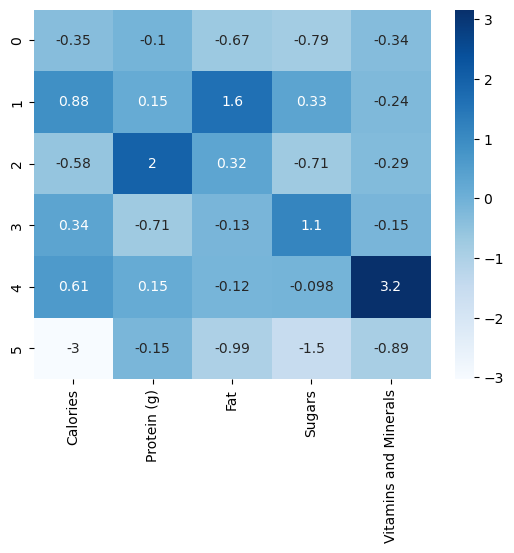

In [29]:
KMeans_6 = KMeans(n_clusters=6,n_init='auto',random_state=2023)
KMeans_6.fit(df_std)

sns.heatmap(pd.DataFrame(KMeans_6.cluster_centers_,columns=df_eng.columns),annot=True,cmap='Blues');

In [ ]:
# Cluster 0,5: Garbage
# Cluster 1: Fatty
# Cluster 2: High Protein
# Cluster 3: Sugar
# Cluster 4: High Vits&minerals

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


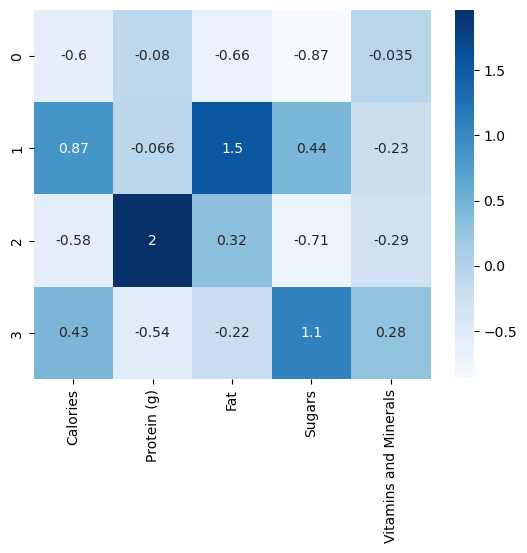

In [30]:
# we will try soemthing in the middle maybe 4

KMeans_4 = KMeans(n_clusters=4,n_init='auto',random_state=2023)
KMeans_4.fit(df_std)

sns.heatmap(pd.DataFrame(KMeans_4.cluster_centers_,columns=df_eng.columns),annot=True,cmap='Blues');

In [ ]:
# Cluster 0: Garbage
# Cluster 1: Fatty
# Cluster 2: High Protein
# Cluster 3: Sugar

In [33]:
df_eng.columns

Index(['Calories', 'Protein (g)', 'Fat', 'Sugars', 'Vitamins and Minerals'], dtype='object')

In [39]:
# Best model is the one that makes more sense 

#Model 1
#Cluster 0: Garbage
#Cluster 1: Sugar
#Cluster 2: High Protein

Model1_Cluster = pd.Series(KMeans_3.labels_,name='Model1_Cluster')
Model1_Cluster=Model1_Cluster.map({0:'Garbage',
                    1:'Sugar',
                    2:'High Protein'})


#Model 2
# Cluster 0: Garbage
# Cluster 1: Fatty
# Cluster 2: High Protein
# Cluster 3: Sugar
Model2_Cluster = pd.Series(KMeans_4.labels_,name='Model2_Cluster')
Model2_Cluster=Model2_Cluster.map({0:'Garbage',
                    1:'Fatty',
                    2:'High Protein',
                    3:'Sugar'})


In [40]:
cluster_names=pd.concat([df,Model1_Cluster,Model2_Cluster],axis=1)
cluster_names

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,Model1_Cluster,Model2_Cluster
0,100%_Bran,Nabisco,70,4,1,6,25,High Protein,High Protein
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0,Sugar,Fatty
2,All-Bran,Kelloggs,70,4,1,5,25,High Protein,High Protein
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25,High Protein,Garbage
4,Almond_Delight,Ralston Purina,110,2,2,8,25,Sugar,Fatty
...,...,...,...,...,...,...,...,...,...
69,Triples,General Mills,110,2,1,3,25,Garbage,Garbage
70,Trix,General Mills,110,1,1,12,25,Sugar,Sugar
71,Wheat_Chex,Ralston Purina,100,3,1,3,25,Garbage,Garbage
72,Wheaties,General Mills,100,3,1,3,25,Garbage,Garbage


In [41]:
cluster_names.columns # Get only columns on clusters


Index(['Cereal Name', 'Manufacturer', 'Calories', 'Protein (g)', 'Fat',
       'Sugars', 'Vitamins and Minerals', 'Model1_Cluster', 'Model2_Cluster'],
      dtype='object')

In [42]:

#Analyze if we can combine clusters These are the cluster centers cetroits
(cluster_names.groupby(['Model1_Cluster','Model2_Cluster'])[['Calories', 'Protein (g)', 'Fat',
       'Sugars', 'Vitamins and Minerals']].mean())


# Recommendation for the clusters related to the Goal

Calories  Protein (g)       Fat     Sugars  \
Model1_Cluster Model2_Cluster                                                 
Garbage        Garbage          96.071429     2.357143  0.321429   3.000000   
High Protein   Garbage          50.000000     4.000000  0.000000   0.000000   
               High Protein     95.000000     4.625000  1.250000   3.625000   
Sugar          Fatty           121.428571     2.428571  2.428571   8.714286   
               Sugar           113.478261     1.913043  0.739130  11.565217   

                               Vitamins and Minerals  
Model1_Cluster Model2_Cluster                         
Garbage        Garbage                     27.678571  
High Protein   Garbage                     25.000000  
               High Protein                21.875000  
Sugar          Fatty                       23.214286  
               Sugar                       34.782609

In [43]:
# Final Clusters GOAL: Set up Cereals displays around store based on various niches of cereals

# Cluster 0: Garbage  (Ceral with 0 Nutricional content)
# Cluster 1,2: High Protein (Fitness Cerals)
# Cluster 3,4: Sugar & Faty (For Kids) 


In [60]:
# These are the Garbage Category (For marketing purposes we can use Adul Cerals)

# Recomendation placed these cerals near bread, eggs pretty much breakfast food

Garbage = cluster_names[(cluster_names['Model1_Cluster'] == 'Garbage') & (cluster_names['Model2_Cluster'] == 'Garbage')]
Garbage.sort_values(by='Vitamins and Minerals',ascending=True).head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,Model1_Cluster,Model2_Cluster
62,Shredded_Wheat_spoon_size,Nabisco,90,3,0,0,0,Garbage,Garbage
20,Cream_of_Wheat_(Quick),Nabisco,100,3,0,0,0,Garbage,Garbage
61,Shredded_Wheat_'n'Bran,Nabisco,90,3,0,0,0,Garbage,Garbage
60,Shredded_Wheat,Nabisco,80,2,0,0,0,Garbage,Garbage
52,Puffed_Wheat,Quaker Oats,50,2,0,0,0,Garbage,Garbage


In [62]:
#These are the Protein Ceteals (Fitness ones)

# Recomendations Placed them near healthy food, chiecken, beef, Jam (not ins

Protein = cluster_names[(cluster_names['Model1_Cluster'] == 'High Protein') & (cluster_names['Model2_Cluster'].isin(['Garbage', 'High Protein']))]
Protein.sort_values(by='Protein (g)', ascending=False).head()


,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,Model1_Cluster,Model2_Cluster
11,Cheerios,General Mills,110,6,2,1,25,High Protein,High Protein
64,Special_K,Kelloggs,110,6,0,3,25,High Protein,High Protein
54,Quaker_Oatmeal,Quaker Oats,100,5,2,-1,0,High Protein,High Protein
0,100%_Bran,Nabisco,70,4,1,6,25,High Protein,High Protein
2,All-Bran,Kelloggs,70,4,1,5,25,High Protein,High Protein


In [67]:
#These are the Sugar And Fatty (Ideal for Kiddos !!!)
# For marketing purposes we can tell Kid's Full-Energy Cerals xd 

# Recomendations Placed them near Candy Section, snacks 

kids = cluster_names[(cluster_names['Model1_Cluster'] == 'Sugar') & (cluster_names['Model2_Cluster'].isin(['Sugar', 'Fatty']))]
kids.sort_values(by=(['Sugars','Fat']), ascending=False).head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,Model1_Cluster,Model2_Cluster
63,Smacks,Kelloggs,110,2,1,15,25,Sugar,Sugar
29,Golden_Crisp,Post,100,2,0,15,25,Sugar,Sugar
49,Post_Nat._Raisin_Bran,Post,120,3,1,14,25,Sugar,Sugar
67,Total_Raisin_Bran,General Mills,140,3,1,14,100,Sugar,Sugar
6,Apple_Jacks,Kelloggs,110,2,0,14,25,Sugar,Sugar
